# Teori
### Oppgave 1
For å modellere fødsel og innvandring la vi til vesktarter for begge variablene, siden jo flere mennesker det er, jo flere fødes. Grunnen til at innvandring er en vekstrate er fordi hvis Aleksandria har mange folk betyr det jo at det er et trygt sted, og derfor vil flere høre om stedet, og flere vil da flykte til Aleksandria. OBS, grafen viser populasjonen per 100 millioner siden ingen bæreevne has blitt ført inn ennå.

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 1')

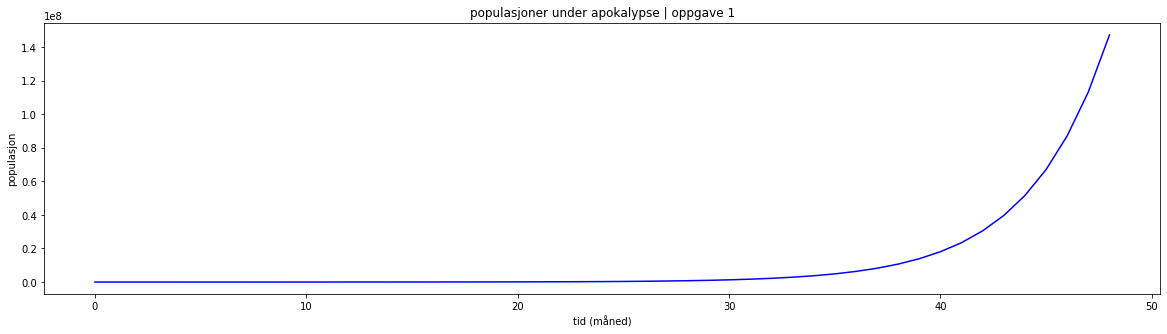

In [21]:
from pylab import *

N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 1
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    tid_array[i] = i
    m_pop_array[i] = p
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 1')

### Oppgave 2
Selv om Aleksandria i dag (April 2020) har en populasjon på 144000 mennesker, har vi lagt bæreevnen ganske lavt, på grunn av resurssmangel. Bæreevnen påvirker populasjonen til Aleksandria, ved at fødsel synker, og at flere drar ut for å hente ressurser (og da dør).

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 2')

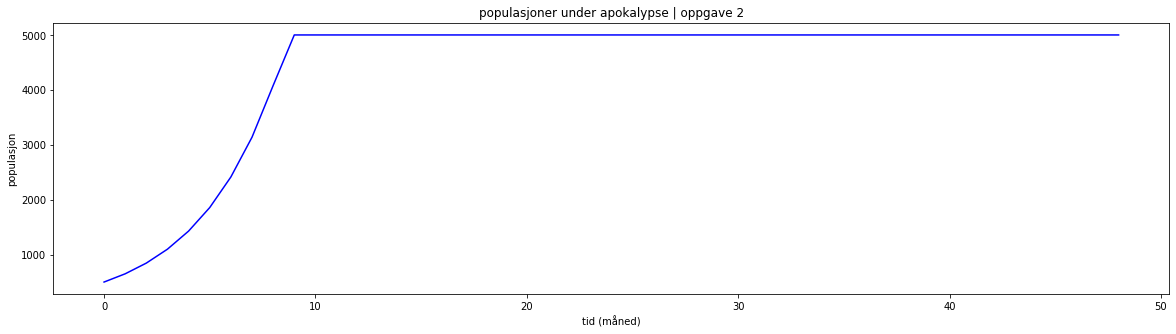

In [22]:
N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 2
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    if p > baereevne:
        p = baereevne
    tid_array[i] = i
    m_pop_array[i] = p
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 2')

### Oppgave 3
Dårlig tilgang til medisiner, leger og hjelp gjør at en del dør av årsaker som ville vært forhindret i dag. Vi kan synke disse faktorene ned med tiden, hvis for eksempel medisiner og lignende blir utviktlet om igjen, men for å holde det relativt enkelt er prosentandelene konstante.

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 3')

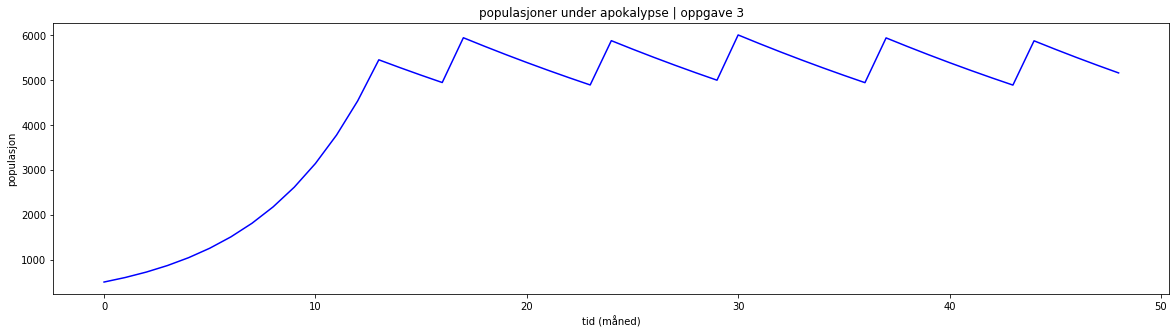

In [32]:
N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 3
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    p -= (syk+skade+alderdom)*p
    myrdet = (hentere*p)*(skade+syk) #antall som dør ute
    p -= myrdet
    if p > baereevne:
        vekstrate_f = 0.01 #vesktrate i fødsel (prosent)
        hentere = 0.3 #prosent, mennesker som henter resursser
    if p < baereevne:
        vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
        hentere = 0.1 #prosent, mennesker som henter resursser
    tid_array[i] = i
    m_pop_array[i] = p
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 3')

### Oppgave 4
Vi starter med 1000 zombier, som dreper en viss andel mennesker som henter ressurser, siden zombiene ikke får tilgang til byen Alexandria. De som blir drept av zombier blir ikke smittet ennå. Andel mennesker som dør kna variere, men for å holde det enkelt er det en konstant andel, vi kan si at en så stor andel som møter zombiene dør i gjennomsnitt per måned.
Siden det er flere som dør nå, har vi endret koden under bæreevne sånn at menneskene føder mindre og har flere som henter ressurser, siden det er mer realistisk enn at populasjonen bare stopper på 5000.

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 4')

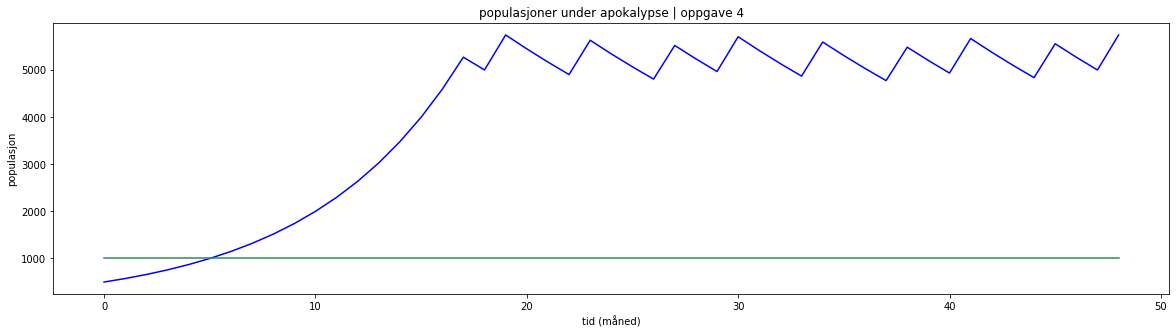

In [24]:
N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 4
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    p -= (syk+skade+alderdom)*p
    myrdet = (hentere*p)*mord #antall døde som blir drept av zombier
    p -= myrdet
    if p > baereevne:
        vekstrate_f = 0.15 #vesktrate i fødsel (prosent)
        hentere = 0.3 #prosent, mennesker som henter resursser
    if p < baereevne:
        vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
        hentere = 0.1 #prosent, mennesker som henter resursser
    tid_array[i] = i
    m_pop_array[i] = p
    z_pop_array[i] = z
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
plot(tid_array,z_pop_array,color='seagreen',label="zombier")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 4')

### Oppgave 5
Vi legger til en prosentandel for at et menneske blir smittet til en zombie, og øker zombiepopulasjonen for hver menneske som blir smittet, og de som er smittet kan komme inn i Aleksandria og smitte flere. For samme grunn som forrige oppgave, er andelen som blir smittet konstant.

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 5')

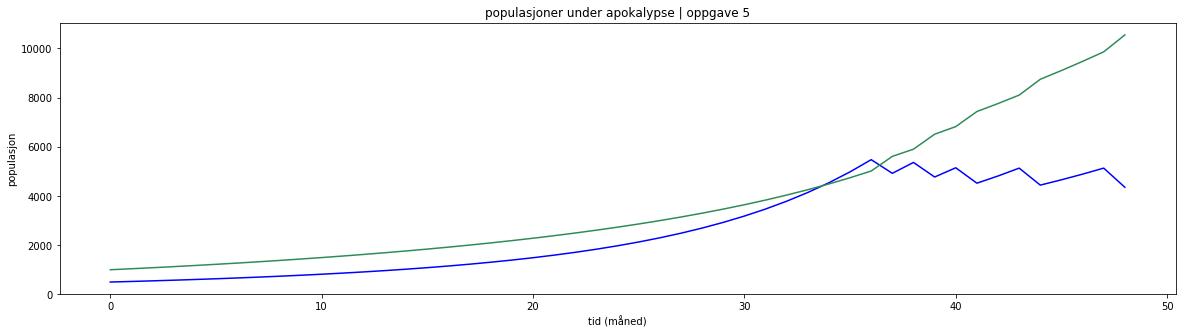

In [25]:
N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 5
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    p -= (syk+skade+alderdom)*p
    myrdet = (hentere*p)*mord #antall døde som blir drept av zombier
    p -= myrdet
    z += myrdet*smittet #antall som blir smittet
    myrdet = z_innvandrere*z*mord
    p -= myrdet
    z += myrdet*smittet
    if p > baereevne:
        vekstrate_f = 0.15 #vesktrate i fødsel (prosent)
        hentere = 0.3 #prosent, mennesker som henter resursser
    if p < baereevne:
        vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
        hentere = 0.1 #prosent, mennesker som henter resursser
    tid_array[i] = i
    m_pop_array[i] = p
    z_pop_array[i] = z
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
plot(tid_array,z_pop_array,color='seagreen',label="zombier")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 5')

### Oppgave 6
Alexandria er lei av at zombie populasjonen øker og dreper et antall zombier med våpen. Dermed øker ikke zombie populasjonen så raskt. Andel zombier som blir drept er konstant.

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 6')

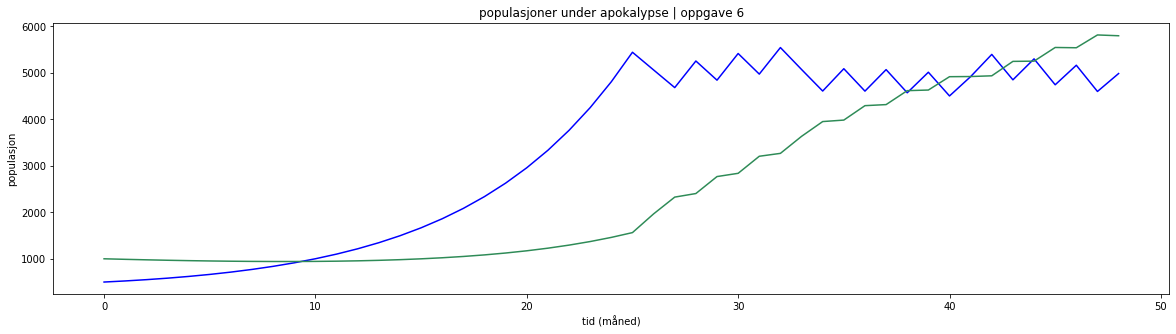

In [26]:
N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 6
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    p -= (syk+skade+alderdom)*p
    myrdet = (hentere*p)*mord #antall døde som blir drept av zombier
    p -= myrdet
    z += myrdet*smittet #antall som blir smittet
    myrdet = z_innvandrere*z*mord
    p -= myrdet
    z += myrdet*smittet
    drept = z*vaapen
    z -= drept
    if p > baereevne:
        vekstrate_f = 0.15 #vesktrate i fødsel (prosent)
        hentere = 0.3 #prosent, mennesker som henter resursser
    if p < baereevne:
        vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
        hentere = 0.1 #prosent, mennesker som henter resursser
    tid_array[i] = i
    m_pop_array[i] = p
    z_pop_array[i] = z
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
plot(tid_array,z_pop_array,color='seagreen',label="zombier")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 6')

### Oppgave 7
Dersom populasjonen for zombier øker for mye, vil Alexandria kalle etter forsterkninger fra Hilltop og Kingdom. Da vil drapsraten for zombiene øke, og populasjonen til zombiene synker. Menneskepopulasjonen øker ikke, siden vi kan gruppere forsterkningene med innvandrere. Dermed trenger vi ikke å øke populasjonen, siden bæreevnen ville ikke latt forsterkningene overleve uansett.

Text(0.5, 1.0, 'populasjoner under apokalypse | oppgave 7')

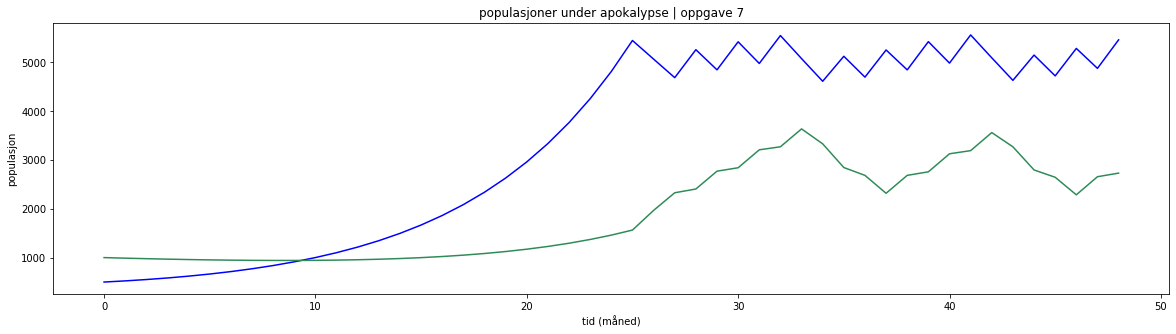

In [27]:
N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

#Kode for oppgave 7
for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    p -= (syk+skade+alderdom)*p
    myrdet = (hentere*p)*mord #antall døde som blir drept av zombier
    p -= myrdet
    z += myrdet*smittet #antall som blir smittet
    myrdet = z_innvandrere*z*mord
    p -= myrdet
    z += myrdet*smittet
    drept = z*vaapen
    z -= drept
    if z > 3500: #Hilltop og Kingdom kommer med forsterkninger
        vaapen = 0.2
    if z < 2500:
        vaapen = 0.05
    if p > baereevne:
        vekstrate_f = 0.15 #vesktrate i fødsel (prosent)
        hentere = 0.3 #prosent, mennesker som henter resursser
    if p < baereevne:
        vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
        hentere = 0.1 #prosent, mennesker som henter resursser
    tid_array[i] = i
    m_pop_array[i] = p
    z_pop_array[i] = z
figure(figsize=(20,5))
plot(tid_array,m_pop_array,color='blue',label="mennesker")
plot(tid_array,z_pop_array,color='seagreen',label="zombier")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse | oppgave 7')

## Resultater
Vi repeterte alle variablene for å forhindre at resultater til oppgavene blir påvirket av en endring i en annen oppgave.

### Oppgave 1
En ganske enkel eksponensiell graf for å starte oppgaven, det er ikke mye å si her, enn at funksjonen har både innvandring og fødsel.

### Oppgave 2
Nå som vi har lagt til en bæreevne, stopper menneskene å reprodusere og innvandrere stopper å komme etter 5000 mennesker (som er bæreevnen). Siden vi ikke har en måte å redusere populasjonen på ennå flater grafen ut. Bæreevnen er påvirket av ressurser i området, folk som dør og reproduksjon.

### Oppgave 3
Siden mennesker nå dør av naturlige årsaker, sykdom og skader, vil populasjonen øke tregere. Og nå som mennesker reduseres, kan vi endre på bæreevnen sånn at menneskene føder mindre og sender ut flere mennesker (som ender opp i flere døde) for å begrense populasjonen.

### Oppgave 4
Zombier har blitt introdusert, og de gjør at mange flere mennesker dør. Derfor økte vi fødsel under bæreevne koden for å menneskene ikke skulle dø ut.

### Oppgave 5
Nå som zombiene kan smitte andre, øker zombiepopulasjonen veldig fort, og de som blir smittet kan smitte flere innenfor Aleksandria om de ikke blir merket før de kommer inn i landsbyen. Siden det ikke er en måte å redusere antall zombier med så øker zombiepopulasjonen eksponensielt.

### Oppgave 6
Menneskene har fått våpen, og derfor øker ikke zombiepopulasjonen like raskt. Menneskepopulasjonen kan nå økes raskere siden de kan drive motangrep mot zombiene.

### Oppgave 7
Selv om grafen har noen spisser (som ikke er deriverbare) er vi fortsatt ganske fornøyde med hvordan grafen ser ut, siden vi kan forestille oss dette i en "reell" situasjon. Som vi kan se, starter begge grafene med en eksponensiell vekst. Deretter er menneskepopulasjonen over bæreevnen, og dermed må flere ut for å hente ressurser, og det blir mindre fødseler. Da øker zombiepopulasjonen siden det er flere mennesker å smitte. Når zombiepopulasjonen blir for stor, vil menneskene i Aleksandria kalle etter forsterkninger fra Hilltop og Kingdom, og da øker drapsraten (vaapen) sånn at flere zombier dør. Forsterkninene vil da forlate byen om zombiepopulasjonen synker nok. Så gjentar alt dette seg videre.
Det at grafen har mange spisser (eller punkter som ikke er deriverbare) er litt synd, men vi mener det er verdt det for å få en grei modell av apokalypsen.

### Andre tanker
Siden det kan komme leger og andre viktige yrker fra innvandring/utdannelse i landsbyen, kunne bæreevnen teknisk sett ha økt, som kunne endret modellene ganske mye.


Det var en ekstra utfordring å måtte jobbe over voice chat, siden vi ikke hadde en god metode for at begge kunne jobbe samtidlig.